<a href="https://colab.research.google.com/github/avinashvarmap/Imageclassification/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Introduction

A Convolutional Neural Networks (CNNs) are a type of Deep Learning algorithm that takes in an image, classifies it according to certain characteristics (learnable weights, etc.), and can differentiate aspects.

CNN's are fully connected neural networks, which are connected to the next layer. CNN consists of input, hidden, and output layers. CNN's are used in deep learning for image processing, classification, recognition, and segmentation. CNN could be able to learn hierarchical features which are mainly used to extract features. CNN provides an excellent classification average for images.

Convolutional architectures are used in deep learning to perform image classification in CNN. In this project, I have used Fashion MNIST datset for imange classification using Alexnet and Lenet5 algorithms to categorize the dataset. I have preprocessed the objects in the dataset and used them for the training and testing models to get accurate results. I have plotted the required visualization reports for the better display of results.

####**Convolutional Neural Network architecture**

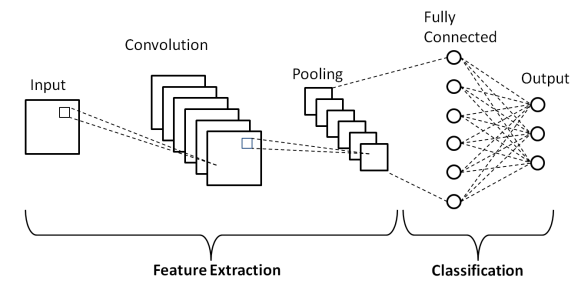

Figure ▶ **CNN architecture**

The CNN architecture consists of different layers namely-

**Convolutional layer**: CNN basically works by comparing the images in small parts. filters are designed to recognize tiny features in the input image. These filters extend through the depth of the input image.

In this layer, we take the filter and slide all the possible areas on the input. The elements are multiplied with the input matrix and they are all summed up. Relocation of the filter through the entire input image helps to conclude that the feature is present all over the image. This is called a Feature map.

Rectified Linear(ReLu) activation function makes every negative value in the output from the convolution layer is changed to zero. This way, it can prevent the values from getting added to zero.

**Pooling Layer**: Pooling Layers are placed in between the two convolution layers. The objective of this layer is to reduce the dimension of the image representation.
Convolution and Pooling Layers are used in Feature Extraction.

**Fully-Connected Layer**: The Convolutional layer and Pooling layer build a block in CNN. These layers increase with the complexity of the data fed into it. The output from the Pooling layer and Convolutional layer is flattened and given as input to the Fully Connected Layer for image classification.

##2.The selected dataset for the algorithm comparison

The Fashion Mnist clothing dataset is a new commonly used dataset in deep learning. The dataset consists of relatively simple data, but this was widely used in deep learning. It can be used to construct models from scratch to monitor performance and to make forecasts to use for other data sets.

The fashion MNIST dataset is more complex than the standard MNIST dataset. It is a collection of Zolanda's article images. The dataset contains 70,000 small square sample images of 28x28 pixels in a grayscale of elements of 10 types of clothing. This dataset is used for machine learning algorithms. It consists of 60,000 training images and 10,000 testing images. The images of the dataset are black and white in colour.

Each image is 28 pixels in width and 28 pixels in height, together they make a total of 784 pixels. There are 10 categories of images present in it. They are a T-shirt/top, Trousers, Pullover, Dress, Coat, Sandals, Shirt, sneakers, Bag, and Ankle boots. The biggest challenge is to select the best model for feature
extraction that has the greatest accuracy.

##3.The algorithms to compare with appropriate reasoning why they were chosen

There are many types of CNN algorithms for feature extraction. The key CNN algorithm is Lenet5.It is named as Lenet5 because it has 5 layers with learnable parameters. Lenet5 can explore the visual representation of required structures in training data with the help of convolutional training.

Lenet5 is also the fundamental representation of every other algorithm. Lenet5 is used because it works on a massive scale of data and it can get the high accuracy result.It consists of total 7 layers, which are 3 convolutional layers, 2 pooling layers, 1 fully connected layer and 1 output layer.

In 2010, AlexNet, a vast, deep convolutional neural network won the ImageNet Large Scale Visual Recognition Competition (ILSVRC). Alexnet also achieved cutting-edge results in ILSVRC 2012 competition, then CNN algorithms are recognized as one of the most powerful classes in building deep learning models.

In this dataset, I have choosen Alexnet and Lenet5 algorithms.


####**Importing libraries**

In [ ]:
#Importing the necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pickle
import time
import seaborn as sns
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D, Resizing, Lambda
from keras.models import Model
from tensorflow.keras.losses import sparse_categorical_crossentropy
from keras.layers import BatchNormalization
from sklearn .metrics import classification_report,confusion_matrix
from keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

####**Loading the Fashion-MNIST dataset**

Using TensorFlow Library to import the data as a train and test dataset.

To use the images for convolutional neural network, we  transform the data frame into 4 dimensions

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#Defining classes for Fashion Mnist Dataset
class_names= ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneakers','Bag','Ankle_Boot']

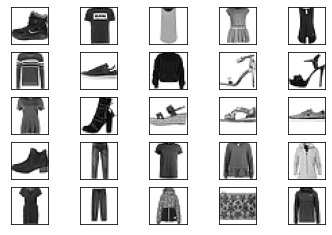

In [ ]:
#Check datasets value
for i in range(25):
#Displaying the first 25 images in 5x5 dimension
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
#Show the images with a color map form matplotlib plot
  plt.imshow(x_train[i], cmap=plt.cm.binary)

####**Preprocessing of Images**

In [ ]:
#Reshaping the dimensions of dataset
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_test_label = y_test
input_shape = (28, 28, 1)
#Transforming the data into float for normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
#Displaying the reshaped dataset
print('x_train shape:', x_train.shape)
print('Number of images in x_train:', x_train.shape[0])
print('Number of images in x_test:', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train: 60000
Number of images in x_test: 10000


The pixels of the images are represented in RBG format which is Red, Green and Black format . The range of each pixel varies from 0 to 255 i.e total of 256 colors. Now we are converting this colors to 0 to 1.

#**Alexnet Model**


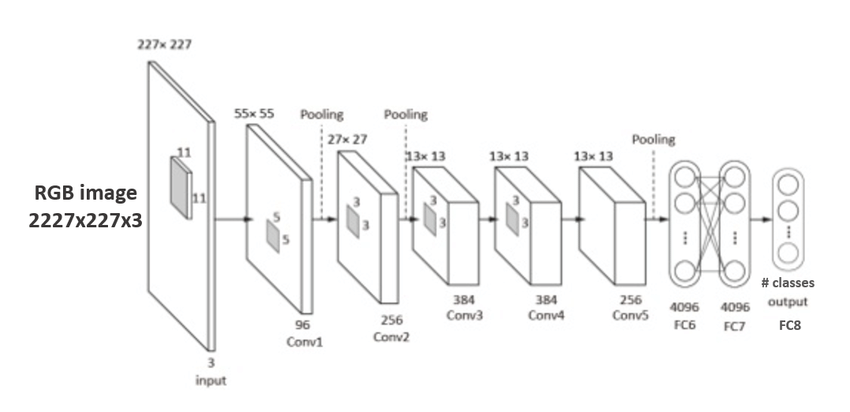

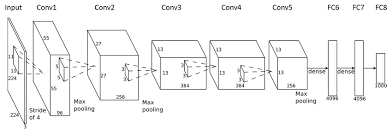

**Figure: Alexnet Architecture**

Alexnet model is the first CNN which increased the performance of the GPU.AlexNet architecture consists of 5 convolutional layers, 3 max-pooling layers, 2 fully connected layers, 2 normalization layers and 1 softmax layer.

It consists of convolutional function and ReLu activation function. Pooling layers present in Alexnet performs max pooling. Max pooling layers helps to downsample the height and width of tensor without change in depth.

Alexnet reduces the chance of overfitting and Data Augmentation can help to give the best results if the data was not sufficient
The input of the alexnet is 256x256 of RGB image.

####**Creation of Alexnet algorithm**

Creating a deep learning model with Keras using sequential API is one of the simple processes. It works stacking one layer after the other.
For CNN creation, we need to use Sequential object and use the 'add' function to add layers.

Batch Normalization is a technique for training Neural Networks, which regulates the input to a layer for every mini-batch. More clearly it is defined as substracting the mini-batch mean and dividing by its standard deviation.

Activation('relu') function is used to display the input as output directly if it is positive, otherwise displays zero. It has become a default activation function because the training will be easier and give the best performance for multilayer Convolutional neural networks.

MaxPooling function is used to select the maximum element from the feature map which is covered by the filter. MaxPooling2D represents 2Dimensional spatial data.
MaxPooling reduces the spatial dimensions of the output. It is always recommended to use a power of 2 if we don't know the number of filters.

Flatten() function is used to convert data into one dimensional array and gives the result as input to proceeding layer.

Dense() function takes all the inputs from previous layers. It performs a matrix-vector multiplication.

The padding function helps to control the size of the input data from the layers.
padding='same' function returns the original size of the data.

In [ ]:
#Alexnet model for feature extraction
model = Sequential()

model.add(Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))

model.add(Conv2D(96, 11, strides=4, padding='same'))
model.add(Lambda(tf.nn.local_response_normalization))
model.add(Activation('relu'))
model.add(MaxPooling2D(3, strides=2))

model.add(Conv2D(256, 5, strides=4, padding='same'))
model.add(Lambda(tf.nn.local_response_normalization))
model.add(Activation('relu'))
model.add(MaxPooling2D(3, strides=2))

model.add(Conv2D(384, 3, strides=4, padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(384, 3, strides=4, padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(256, 3, strides=4, padding='same'))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        11712     
                                                                 
 lambda (Lambda)             (None, 56, 56, 96)        0         
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         614656    
                                                        

In [ ]:
model.compile(optimizer='adam', loss=sparse_categorical_crossentropy, metrics=['accuracy'])

We need to set up a learning process before training the model. To configure the model we need an optimizer, loss, and metrics of measurement like accuracy.

The optimizer function updates weights using gradients to reduce loss function.

The loss function is a measurement of the accuracy of our model to achieve the given objective.

####**Training the Alexnet model**

Now the model is ready for training. During training, we normally use the 'fit' function. Passing x_data, y_data, epochs and batch_size. I have also used validation_data to check the loss and accuracy of both sets.

**Epoch**: When an entire dataset is moved forward and backward in a neural network then it is called one epoch.

**Batch size**: The batch size represents the number of samples processed before the model update. It should be less than or equal to the number of samples in the training dataset and greater than or equal to one. It controls the estimation accuracy of error gradients in neural networks.

In [ ]:
alexnet_time= time.time()
history = model.fit(x_train, y_train, batch_size=512, epochs=5, validation_data=(x_test, y_test))
alexnet_GPU.time = time.time() - alexnet_time

NameError: ignored

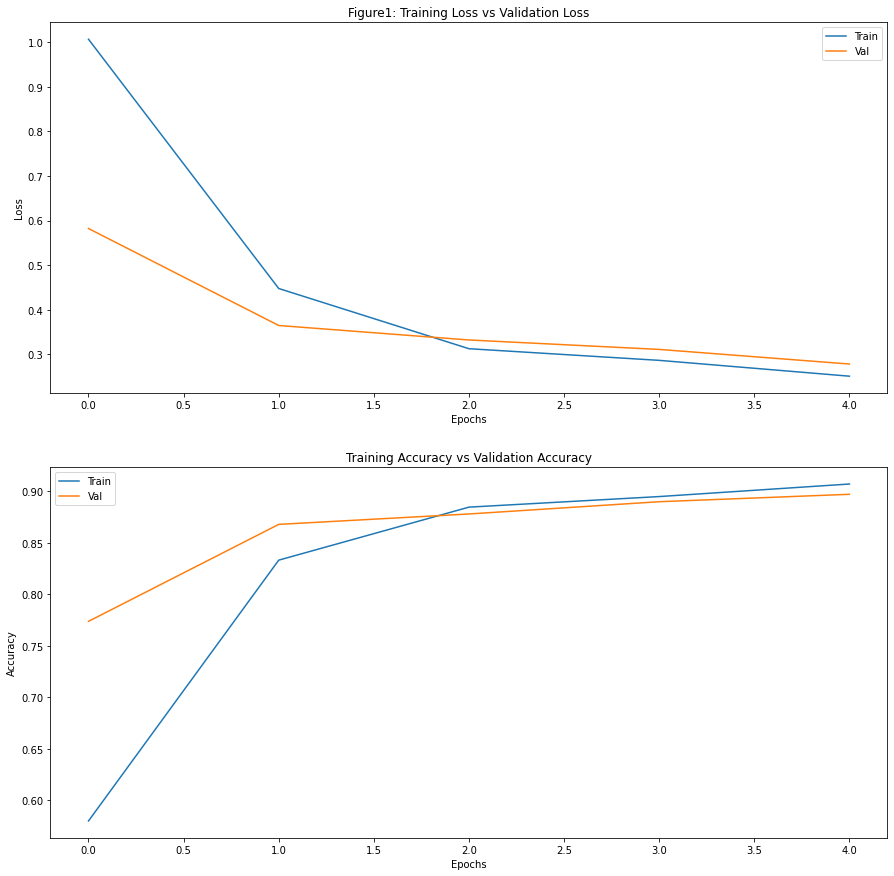

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
#Ploting the graph between loss and val_loss
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Figure1: Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])


Figure1: In the above cell, I have plotted the graph between Training graph and Validation Loss which was obtained from model training. To see the performance of the model. x-axis represents the labels on x-axis i.e 'Epochs' and y-axis represents the labels on y-axis i.e 'Loss'. Th blue line the Training loss and orange line represents the Validation Loss. There is a decrease in the trend for both the losses On validation data,some neurons using drop out will not leave random neurons. The main reason is the use of drop out during training by some noise to avoid over-fitting. This shows that there is no overfitting

Figure2: I also plotted the graph between Training Accuracy and Validation Accuracy to validate the performance of it. x-axis represents labels on x-axis i.e 'Epochs' and y-axis represents labels on y-axis i.e 'Accuracy'. There is a increase in the validation accuracy and training accuracy. There is no much of difference betweent then and it is acceptable.

####**Testing the Alexnet model**

Testing of the model is necessary to make the model accurate

In [ ]:
#Evaluate the x_test and y_test
model.evaluate(x_test, y_test)

313/313 [==============================] - 12s 39ms/step - loss: 0.2786 - accuracy: 0.8970


[0.2785942256450653, 0.8970000147819519]

In [ ]:
#assigning the predicted results to the variable
prediction_values = model.predict(x_test)
alexnet_prediction = prediction_values
#np.argmax returns the max value of the numpy array
prediction_values = np.argmax(prediction_values, axis=1)

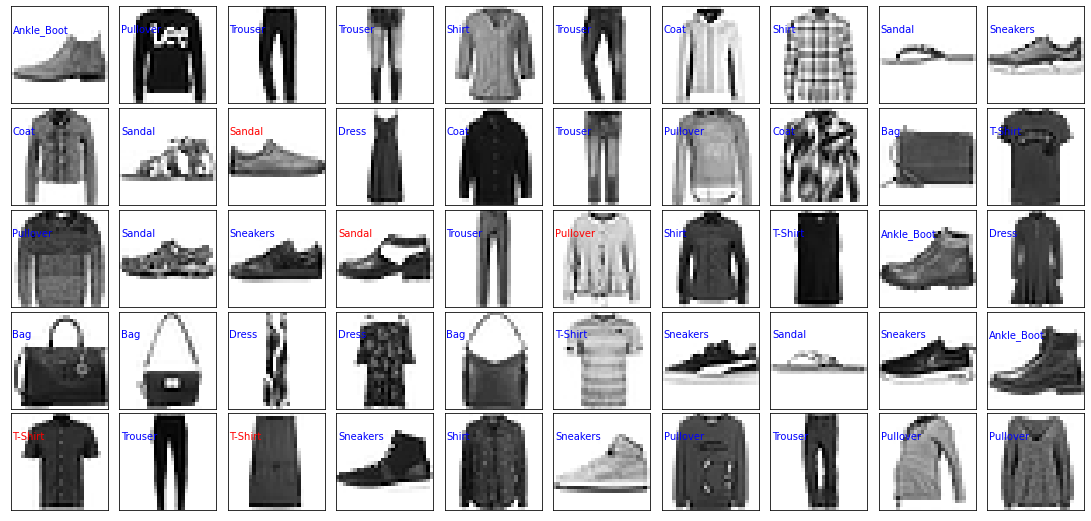

In [ ]:
# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the images: each image is 28x28 pixels
for i in range(50):
  ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(x_test[i].reshape(28,28),cmap=plt.cm.gray_r, interpolation='nearest')

  if prediction_values[i] == y_test[i]:
    # label the image with the blue text
    ax.text(0, 7, class_names[prediction_values[i]], color='blue')
  else:
    # label the image with the red text
    ax.text(0, 7, class_names[prediction_values[i]], color='red')

I have predicted 50 images of testing dataset, to check if the data is correctly predicted or not with respect to their classnames. I have assigned blue color if it correctly predicts the image and assigned red color, if it does not predict the image in testing dataset.

From the above output, it predicted the data correctly fo most of the class names and there are a few wrongly predicted images. I could say that model has performed well.

####**Confusion matrix for Alexnet model**

The Confusion matrix is defined as the statistical classification of predicted results. It compares the predicted values with the actual values for a better visualization report. Each row of the matrix represents the predicted values and each column represents the actual values. The name itself says if the system is confusing the class names which means miscategorizing the labels.

In [ ]:
def conf_matrix(predictions):
    ''' Plots conf. matrix and classification report '''
    cm=confusion_matrix(y_test_label, np.argmax(np.round(predictions), axis=1))
    print("Classification Report:\n")
    cr=classification_report(y_test_label,
                                np.argmax(np.round(predictions), axis=1),
                                target_names=[class_names[i] for i in range(len(class_names))])
    print(cr)
    plt.figure(figsize=(12,12))
    sns_hmp = sns.heatmap(cm, annot=True, xticklabels = [class_names[i] for i in range(len(class_names))],
                yticklabels = [class_names[i] for i in range(len(class_names))], fmt="d")

    fig = sns_hmp.get_figure()

Classification Report:

              precision    recall  f1-score   support

     T-Shirt       0.69      0.93      0.79      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.76      0.90      0.83      1000
       Dress       0.91      0.92      0.92      1000
        Coat       0.88      0.72      0.79      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.85      0.56      0.68      1000
    Sneakers       0.96      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle_Boot       0.99      0.95      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000


Confusion Matrix Graph--->


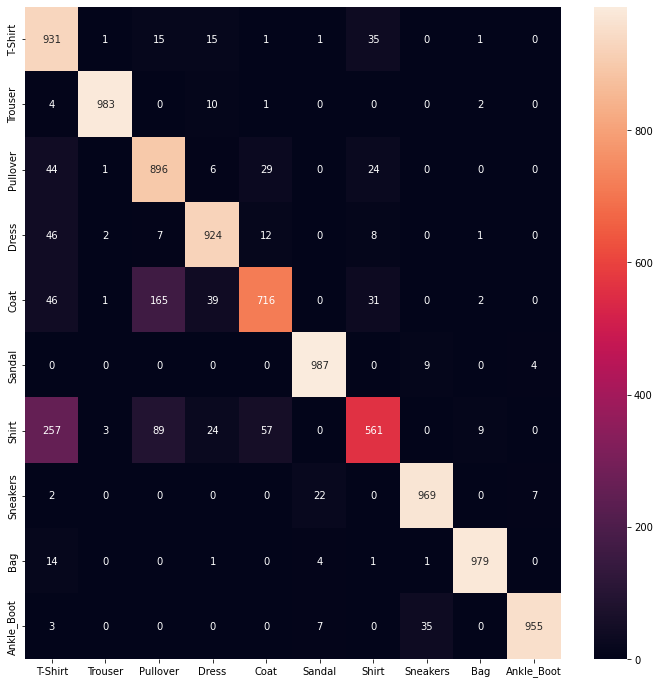

In [ ]:
conf_matrix(alexnet_prediction)
#print the title for the confusion matrix
print('\nConfusion Matrix Graph--->')

From the Confusion matrix, f1 score is defined as the harmonic mean of precision and recall. It gives better results than accuracy. Looking at the f1 score, the classes like Bag, Sandal, Trouser has the best accuracy of more than 90% during prediction. The least f1 score is recorder to Shirt which is less than 70%.



#**Lenet-5 Model**

Lenet5 is a type of CNN architecture for hand-printed and image classification feature extraction. It is the basic and first model to be introduced in CNN. It consists of 7 layers. These layers consist of two sets of convolutional layers and average pooling layers, a flattening layer, two layers that are fully connected, and a softmax layer.

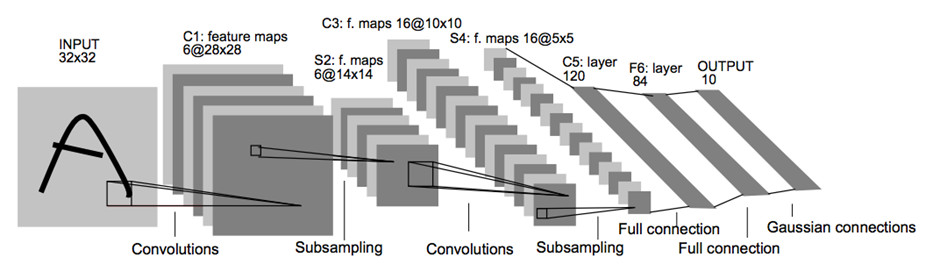

**Figure: Lenet5 architecture**

The first layer is the input layer with a size of 32x32.

Then followed by the first convolutional layer which has 6 filters and each is of size 5x5. There is an activation function used in this layer called tanh.
the output is 10x10x16.

After this layer, we have an average pooling layer of 2x2. Due to this, the size of the feature map is reduced to 5x5x16. now the second set of average pooling layers with a 2x2 sized filter and the size is decreased to 5x5x16.
The pooling layer has 120 filters of size 5x5 and activation function tanh. the size is 120.

Now fully connected layer has 84 neurons so it gives the output as 84 values with the help of the tanh activation function.

The output layer has 10 neurons and uses softmax functions. The softmax function's purpose is to confirm that data belongs to the particular class.
This is how the Lenet5 model works

In [ ]:
# Building the Lenet5 model
class LeNet(Sequential):
  def __init__(self, input_shape, nb_classes):
    super().__init__()

    self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"))
    self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
    self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    self.add(Flatten())
    self.add(Dense(120, activation='tanh'))
    self.add(Dense(84, activation='tanh'))
    self.add(Dense(nb_classes, activation='softmax'))

    self.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# Convert class vectors to binary class matrices.
num_classes = 10
#Defining the number of classes
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
Lenet_model = LeNet(x_train[0].shape, num_classes)

**Training the Lenet model**

In [ ]:
#Train the model using x_train and y_train, validating using x_test, y_test
hist = Lenet_model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=10,batch_size=128, verbose=1)
hist

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.5976 - accuracy: 0.7836 - val_loss: 0.4575 - val_accuracy: 0.8391
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4088 - accuracy: 0.8527 - val_loss: 0.4133 - val_accuracy: 0.8510
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3629 - accuracy: 0.8680 - val_loss: 0.3858 - val_accuracy: 0.8611
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3359 - accuracy: 0.8769 - val_loss: 0.3683 - val_accuracy: 0.8661
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3148 - accuracy: 0.8834 - val_loss: 0.3496 - val_accuracy: 0.8726
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2997 - accuracy: 0.8893 - val_loss: 0.3465 - val_accuracy: 0.8730
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2834 - accuracy: 0.8950 - val_loss: 0.3275 - val_accuracy: 0.8809
Epoch 

Lenet5 got a train accuracy of 90% and validation accuracy of 88%. The performance of the model is very good. There is only a few loss of data while training

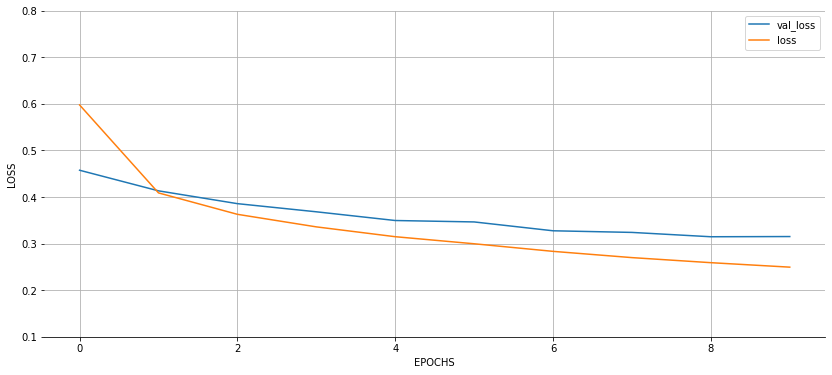

In [ ]:
val_acc = hist.history['val_accuracy']
acc = hist.history['accuracy']
val_loss = hist.history['val_loss']
loss = hist.history['loss']

fig = plt.figure(figsize=(14,6))
plt.plot(np.arange(len(val_loss)),val_loss,label='val_loss')
plt.plot(np.arange(len(loss)),loss,label='loss')
plt.ylim(0.1,0.8)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.grid()
sns.despine(left=True)
plt.show()

There is a less gap between the validation loss and and loss. so there will be no chance of overfitting. From the epochs we can say that there is oly a 10% difference between the val_loss and loss, which is acceptable


Value Accuracy |  88.58 %


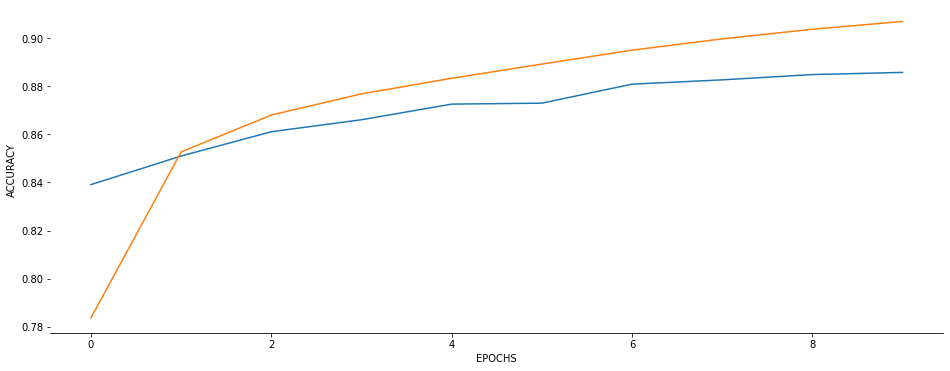

In [ ]:
print("\nValue Accuracy | ",round(val_acc[len(acc)-1]*100,2),'%')
fig = plt.figure(figsize=(16,6))
plt.plot(np.arange(len(val_acc)),val_acc,label='val_accuracy')
plt.plot(np.arange(len(acc)),acc,label='Accuracy')
plt.xlabel("EPOCHS")
plt.ylabel('ACCURACY')
sns.despine(left=True)
plt.show()

The difference between the val_accuracy and accuracy curves is small and they have increased with the increase in the number of epochs. The model appears to be working well.

**Testing the Lenet5 model**

In [ ]:
#Using model.predict to test the data with x_test
predict = Lenet_model.predict(x_test)


Confusion Matrix--->
Classification Report:

              precision    recall  f1-score   support

     T-Shirt       0.68      0.84      0.75      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.83      0.80      0.81      1000
       Dress       0.92      0.86      0.89      1000
        Coat       0.85      0.75      0.79      1000
      Sandal       0.99      0.96      0.97      1000
       Shirt       0.71      0.71      0.71      1000
    Sneakers       0.96      0.92      0.94      1000
         Bag       0.98      0.97      0.97      1000
  Ankle_Boot       0.92      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



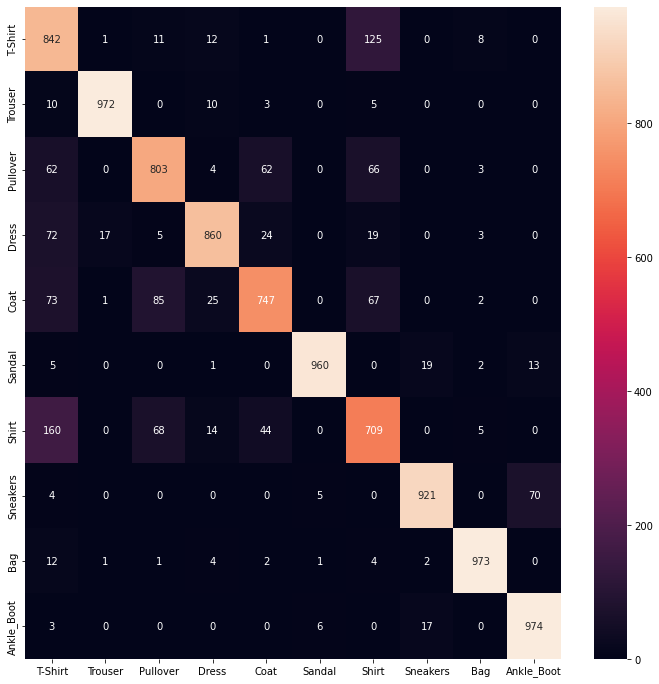

In [ ]:
#Confusion matrix
print('\nConfusion Matrix--->')
conf_matrix(predict)

From the Confusion matrix, the f1 score of the classes namely Bag, Ankle boot, Sandal, Trouser, Sneaker have a percentage of over 90%. The Shirt class performns a score less than 70%.

**Predicting images of testing dataset**

Some Predicted Images


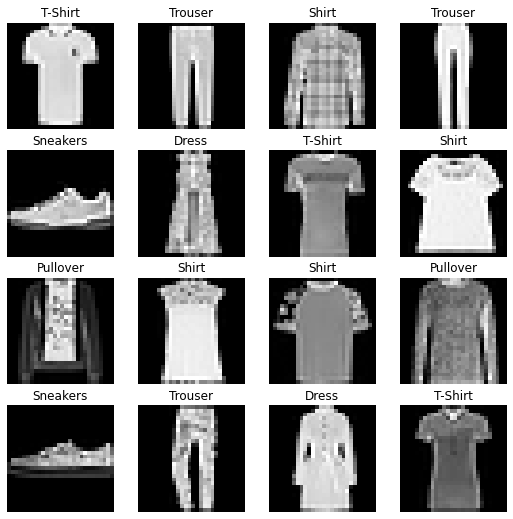

In [ ]:
x_test = x_test.reshape(-1,28,28)

print('Some Predicted Images')
fig, axes = plt.subplots( 4,4,figsize = (9,9))
for row in axes:
    for j in row:
        index = np.random.randint(len(predict))
        j.imshow(x_test[index],cmap='gray')
        j.set_title(class_names[np.argmax(predict[index])])
        j.set_axis_off()

From the result, we can say that the model performs well while doing the predictions

In [ ]:
def prediction():
    try:
        plt.figure(figsize=(3,3))
        index= int(input("\nEnter index for test data :"))
        print('\n   Predicted Image :',class_names[np.argmax(predict[index])])
        plt.imshow(x_test[index]*255,cmap='gray')
        plt.axis('off')
        plt.show()
        print('   Original Image :',class_names[np.argmax(y_test[index])])
    except:
        print("Enter index upto 9999")


Enter index for test data :22

   Predicted Image : Sneakers


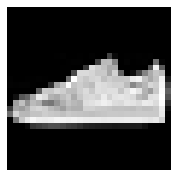

   Original Image : Sneakers


In [ ]:
prediction()

In the above cell, defined a function to display which number in test data has the corresponding image.
When I run the code, it displays a box to enter the index from 0 to 9999. when you enter a particular index number it will display the predicted image.
This is to check predicted image matches with the original image

##Conclusion

The Convolutional Neural Networks are capable of performing very well on large datasets in deep learning as shown by the above results.

The main concept of the work is to show how well the CNN algorithms perform. By using Alexnet and Lenet algorithms, I have easily performed feature extraction using different layers present in each model, which will help to classify any large dataset. The results showed that we got an accuracy percentage of more than 90% in the algorithms. The comparison of the accuracy and loss also helped to understand the processing in each algorithm.

As future work, I would like to perform how well the other algorithms like Googlenet, VGG, Resnet, etc of CNN work for feature extraction. It is also interesting to work with different datasets and check how well these algorithms work. Another future work is to use different strategies to control the computational costs and get a higher accuracy rate.

